In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

In [2]:
raw_data = pd.read_csv("results/metrics.csv")

In [136]:
def plot_confusion_matrix(array, cnn, optim):
    df_cm = pd.DataFrame(array, range(2), range(2))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='g') # font size
    
    tick_marks = np.arange(2)
    target_names = ["True", "False"]
    plt.xticks(tick_marks +0.5, target_names, va='center')
    plt.yticks(tick_marks+0.5, target_names, rotation=360, va='center')
    
    plt.xlabel("True Class")
    plt.ylabel("Predicted Class")
    
    plt.title("Confusion Matrix - " + cnn + " - " + optim)
    path = cnn + "-" + optim + "-" + "confmatrix.png"
    
    plt.savefig(path)
    plt.close()

In [137]:
results = raw_data.drop([1,2,3,8])

In [138]:
results

,version,model,date,numb_epochs,accuracy,balanced_accuracy,precision,recall,tp,fp,tn,fn,f1
0,1.0,resnet50,25-05-21,200,73.044426,71.177686,0.881163,0.747320,2091,282,589,707,0.808741
4,2.0,vgg16,07-06-21,200,82.174980,75.566411,0.882195,0.883145,1640,219,370,217,0.882670
5,3.0,vgg16,06-06-21,200,24.080131,50.000000,0.000000,0.000000,0,0,589,1857,0.000000
6,4.0,mobilenetv2,06-06-21,200,64.513491,72.339599,0.934916,0.572429,1063,74,515,794,0.710087
7,6.0,resnet50,08-06-21,200,39.738348,59.384900,0.961446,0.214863,399,16,573,1458,0.351232


In [139]:
optim_list = ["Adam", "SGD", "Adam", "Adam", "SGD"]

In [140]:
for index, df_index in enumerate(results.index):
    tp = results.tp[df_index]
    fp = results.fp[df_index]
    tn = results.tn[df_index]
    fn = results.fn[df_index]
    
    array = np.array([[tp, fp], [fn, tn]])
    
    cnn = results.model[df_index]
    optim = optim_list[index]
        
    plot_confusion_matrix(array, cnn, optim)

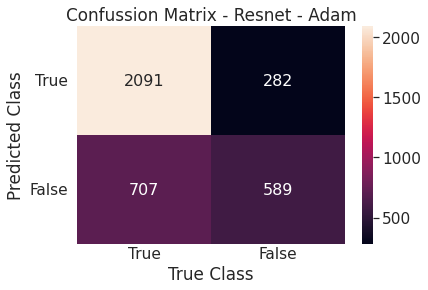

In [104]:
tp = raw_data.tp[0]
fp = raw_data.fp[0]
tn = raw_data.tn[0]
fn = raw_data.fn[0]

array = np.array([[tp, fp], [fn, tn]])
# norm_array = array.astype('float') / array.sum(axis=1)[:, np.newaxis]
total = tp + fp + tn + fn
plot_confusion_matrix(array, "Resnet", "Adam")

In [ ]:
(2091+589)/(2091+282+707+589)


In [36]:
2091/(2091+282)

0.8811630847029077

In [38]:
2091/(2091 + 707)

0.7473195139385275